In [1]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

In [3]:
df_all_1key = pd.read_csv('../features_cbc/features_cbc_3000/features_cbc_3000_1key_csv/features_all.csv')
df_all_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0873.py.enc,pyth_cbc,7.959646,127.532717,5435.571132,73.726326,0.003400,-1.208655,471067,10.309592,...,18,14,12,19,7,17,12,15,26,DES
1,file0973.py.enc,pyth_cbc,7.863339,125.566621,5425.498309,73.657982,0.022221,-1.159587,155187,10.323976,...,10,8,7,3,5,4,8,5,7,DES
2,file0666.py.enc,pyth_cbc,7.976577,127.976043,5349.670227,73.141440,-0.000517,-1.163999,746544,10.257013,...,37,32,25,24,17,27,25,32,41,DES
3,file0766.py.enc,pyth_cbc,7.948873,127.610900,5572.893341,74.651814,0.001956,-1.222084,379309,10.141475,...,13,13,12,21,16,22,17,21,15,DES
4,file0605.py.enc,pyth_cbc,7.959486,126.795370,5494.078497,74.122051,-0.000833,-1.197959,453904,10.250384,...,14,13,16,18,17,21,20,18,18,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,image_0519.bmp.enc,bmp_cbc,7.999436,127.654134,5465.018813,73.925766,-0.001237,-1.200799,31632778,10.274554,...,1191,1211,1127,1221,1218,1191,1171,1162,1136,AES
17996,image_0471.bmp.enc,bmp_cbc,7.998370,127.798898,5450.350026,73.826486,-0.006050,-1.198709,13096415,10.263742,...,473,525,512,502,497,473,488,459,496,AES
17997,image_0509.bmp.enc,bmp_cbc,7.999021,127.376662,5469.116444,73.953475,0.002647,-1.201493,24797423,10.266225,...,964,900,937,949,926,939,951,916,906,AES
17998,image_0152.bmp.enc,bmp_cbc,7.998431,127.490142,5485.339283,74.063076,0.000999,-1.204539,12463270,10.273722,...,483,476,469,495,480,467,466,439,491,AES


In [4]:
df_all_3keys = pd.read_csv('../features_cbc/features_cbc_3000/features_cbc_3000_3keys_csv/features_all.csv')
df_all_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0873.py.enc,pyth_cbc,7.962755,128.662455,5482.382904,74.043115,-0.006204,-1.191571,468570,10.282231,...,33,23,22,18,13,25,17,18,19,DES
1,file0973.py.enc,pyth_cbc,7.850743,126.068681,5561.103799,74.572809,0.017542,-1.246970,156414,10.364709,...,8,5,7,4,6,3,10,4,4,DES
2,file0666.py.enc,pyth_cbc,7.969428,126.999014,5610.216318,74.901377,0.013267,-1.232928,739573,10.209012,...,29,30,31,31,26,22,33,33,24,DES
3,file0766.py.enc,pyth_cbc,7.952636,127.524946,5325.444063,72.975640,-0.013212,-1.160993,383470,10.196949,...,12,16,12,16,16,11,9,9,16,DES
4,file0605.py.enc,pyth_cbc,7.952594,126.337731,5335.704687,73.045908,0.010549,-1.193529,457125,10.286689,...,18,21,10,14,10,16,18,17,12,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,image_0519.bmp.enc,bmp_cbc,7.999363,127.287527,5443.809064,73.782173,0.002479,-1.197251,31596717,10.268696,...,1185,1133,1152,1142,1152,1144,1147,1111,1150,AES
17996,image_0471.bmp.enc,bmp_cbc,7.998694,127.836398,5460.604500,73.895903,-0.009153,-1.198236,13146127,10.283203,...,503,477,449,534,476,430,482,462,513,AES
17997,image_0509.bmp.enc,bmp_cbc,7.999229,127.436450,5462.789399,73.910685,-0.000984,-1.201022,24864708,10.280143,...,977,877,932,912,912,901,923,900,878,AES
17998,image_0152.bmp.enc,bmp_cbc,7.998160,127.378946,5473.565156,73.983547,0.002802,-1.201645,12462294,10.273320,...,459,491,468,412,467,489,478,479,458,AES


In [5]:
df_all_6keys = pd.read_csv('../features_cbc/features_cbc_3000/features_cbc_3000_6keys_csv/features_all.csv')
df_all_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0873.py.enc,pyth_cbc,7.955724,127.728565,5559.080881,74.559244,-0.003741,-1.202195,469213,10.289284,...,22,19,21,15,18,22,32,20,15,DES
1,file0973.py.enc,pyth_cbc,7.869084,126.760989,5721.768423,75.642372,0.009069,-1.254381,154954,10.316223,...,8,7,5,5,1,3,6,7,4,DES
2,file0666.py.enc,pyth_cbc,7.975942,127.798337,5515.074749,74.263549,-0.014209,-1.199817,745755,10.251591,...,25,21,30,27,27,29,23,40,27,DES
3,file0766.py.enc,pyth_cbc,7.939765,128.635575,5432.916001,73.708317,-0.023572,-1.169344,385476,10.223585,...,18,11,23,15,15,16,13,18,15,DES
4,file0605.py.enc,pyth_cbc,7.958636,127.641667,5411.530856,73.563108,-0.021086,-1.195965,459712,10.315756,...,15,23,18,19,18,12,13,16,17,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,image_0519.bmp.enc,bmp_cbc,7.999492,127.652242,5462.472277,73.908540,0.000487,-1.201640,31623259,10.273008,...,1214,1139,1160,1197,1190,1175,1150,1139,1173,AES
17996,image_0471.bmp.enc,bmp_cbc,7.998456,127.288216,5470.863738,73.965287,0.004849,-1.203342,13104189,10.266788,...,483,472,487,481,522,489,510,516,467,AES
17997,image_0509.bmp.enc,bmp_cbc,7.999156,127.429229,5469.746607,73.957735,0.000689,-1.202854,24863335,10.279860,...,925,888,907,920,936,929,949,873,902,AES
17998,image_0152.bmp.enc,bmp_cbc,7.998335,127.251795,5444.541172,73.787134,0.005535,-1.196671,12422356,10.256845,...,421,453,478,474,454,501,444,426,492,AES


In [6]:
encoder = LabelEncoder()
df_all_1key['algorithm'] = encoder.fit_transform(df_all_1key['algorithm'])
print(encoder.classes_)

X = df_all_1key.drop(columns=["algorithm", "file_name", "format"])
y = df_all_1key["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []
    
    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

(<pandas.io.formats.style.Styler at 0x107593130>,
 <pandas.io.formats.style.Styler at 0x164012f70>)

In [8]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.509222,0.006642,0.497921,0.006605,0.509222,0.006642,0.501751,0.006601,1.002599,0.798428
1,SVM,0.407667,0.003468,0.429887,0.057542,0.407667,0.003468,0.362811,0.023911,1.136307,0.727636
2,NaiveBayes,0.296056,0.004046,0.311912,0.027057,0.296056,0.004046,0.260266,0.011285,10.471920,0.667120
3,KNN,0.459333,0.005518,0.453435,0.005799,0.459333,0.005518,0.450868,0.005719,6.457090,0.731706
4,Bagging,0.502611,0.004583,0.492347,0.004319,0.502611,0.004583,0.495527,0.004336,1.009529,0.794944
5,AdaBoost,0.427000,0.008173,0.500681,0.040034,0.427000,0.008173,0.353206,0.015570,1.582531,0.743989


In [2]:
import pandas as pd
import io

csv_data = """
RandomForest,0.509222,0.006642,0.497921,0.006605,0.509222,0.006642,0.501751,0.006601,1.002599,0.798428
SVM,0.407667,0.003468,0.429887,0.057542,0.407667,0.003468,0.362811,0.023911,1.136307,0.727636
NaiveBayes,0.296056,0.004046,0.311912,0.027057,0.296056,0.004046,0.260266,0.011285,10.471920,0.667120
KNN,0.459333,0.005518,0.453435,0.005799,0.459333,0.005518,0.450868,0.005719,6.457090,0.731706
Bagging,0.502611,0.004583,0.492347,0.004319,0.502611,0.004583,0.495527,0.004336,1.009529,0.794944
AdaBoost,0.427000,0.008173,0.500681,0.040034,0.427000,0.008173,0.353206,0.015570,1.582531,0.743989
"""

# Definicje polskich nazw kolumn (11 kolumn, w tym AUC)
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame (opcjonalnie, pokaże tabelę w konsoli)
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.509222,0.006642,0.497921,0.006605,0.509222,0.006642,0.501751,0.006601,1.002599,0.798428
1,SVM,0.407667,0.003468,0.429887,0.057542,0.407667,0.003468,0.362811,0.023911,1.136307,0.727636
2,NaiveBayes,0.296056,0.004046,0.311912,0.027057,0.296056,0.004046,0.260266,0.011285,10.471920,0.667120
3,KNN,0.459333,0.005518,0.453435,0.005799,0.459333,0.005518,0.450868,0.005719,6.457090,0.731706
4,Bagging,0.502611,0.004583,0.492347,0.004319,0.502611,0.004583,0.495527,0.004336,1.009529,0.794944
5,AdaBoost,0.427000,0.008173,0.500681,0.040034,0.427000,0.008173,0.353206,0.015570,1.582531,0.743989


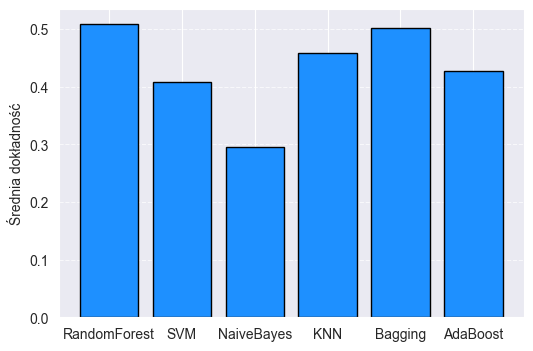

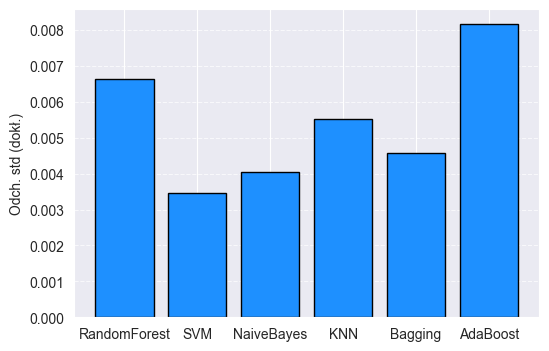

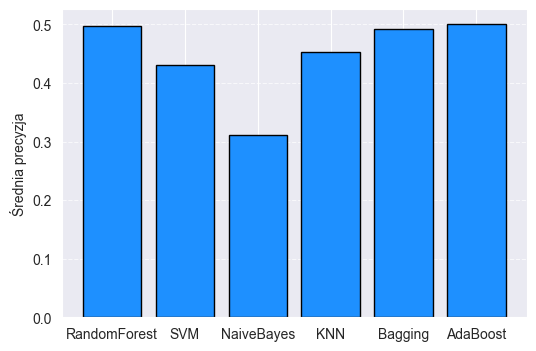

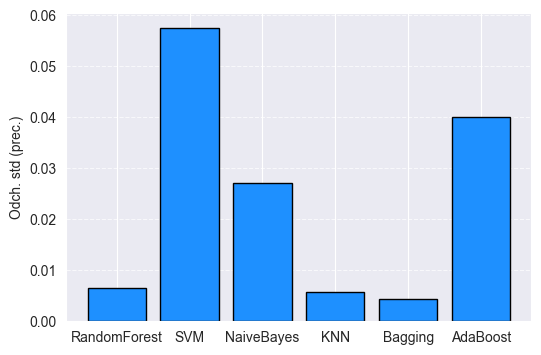

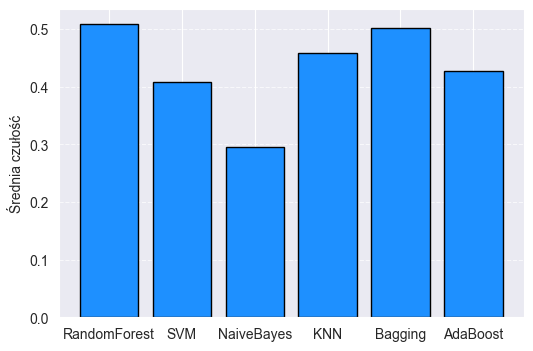

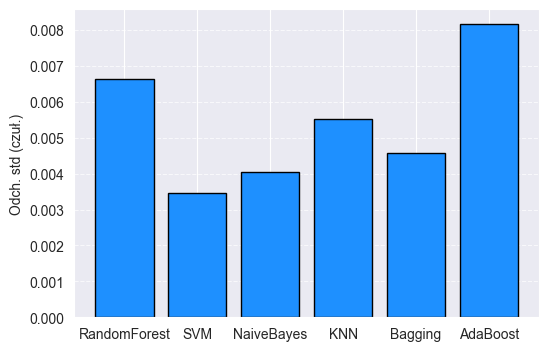

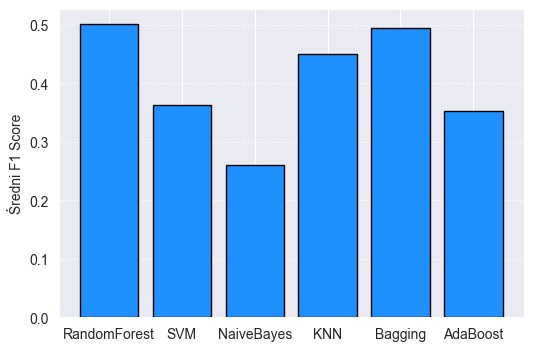

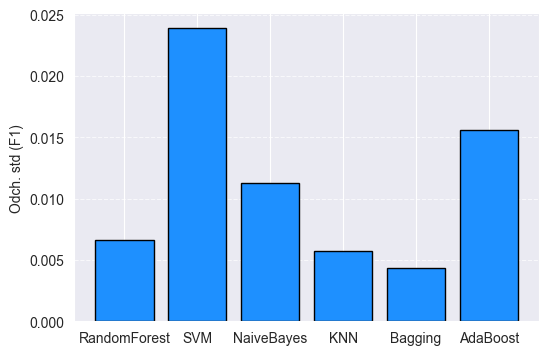

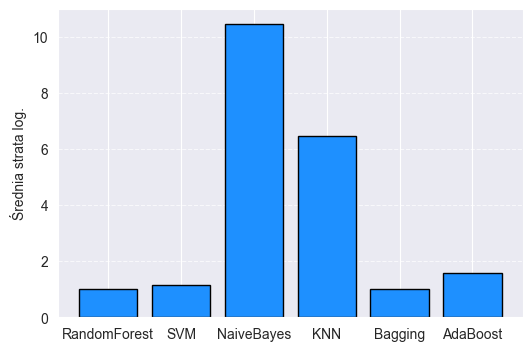

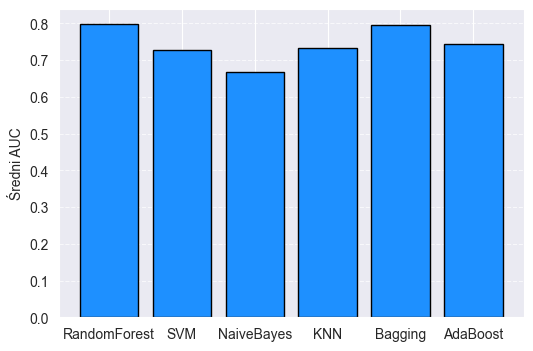

In [3]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

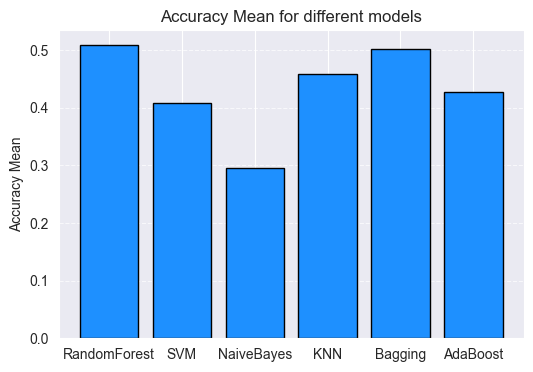

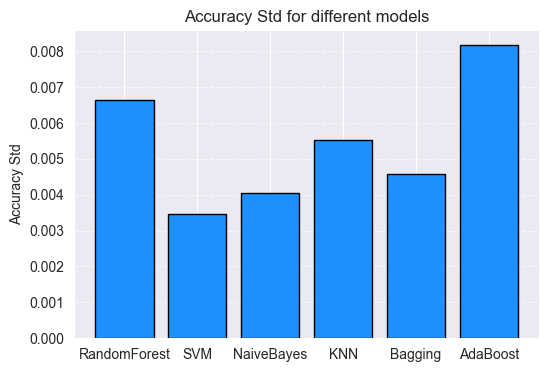

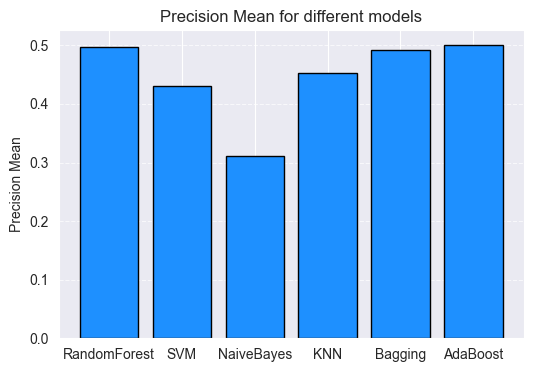

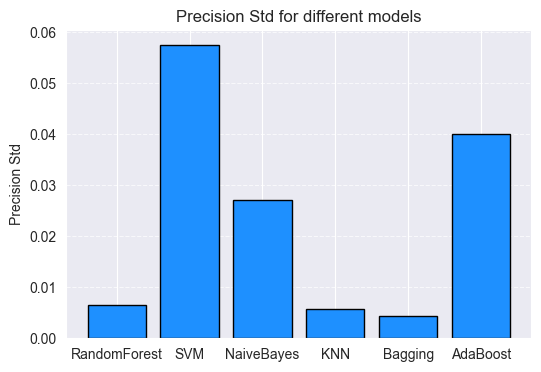

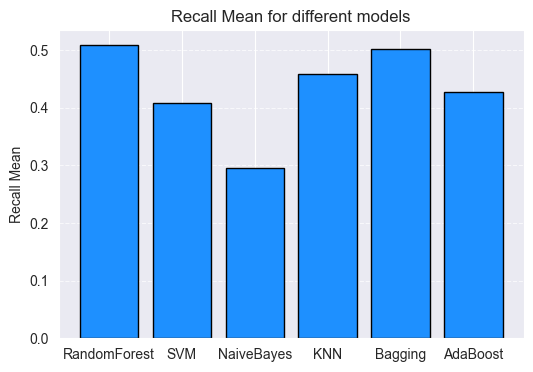

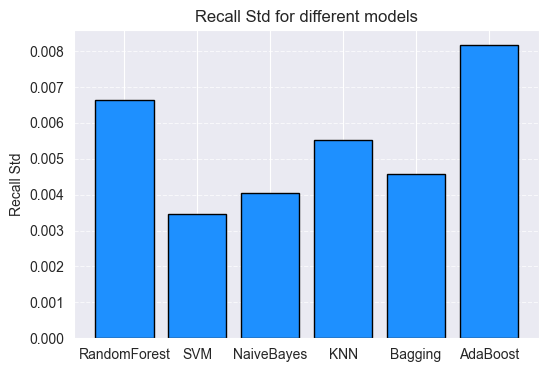

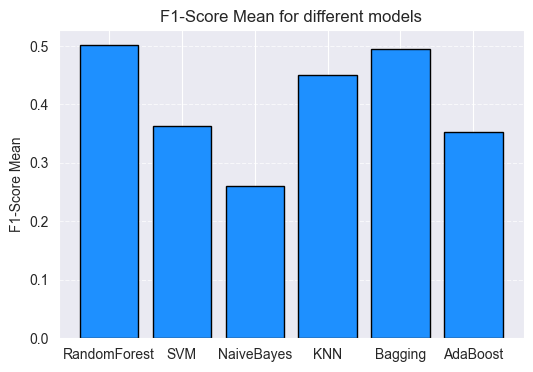

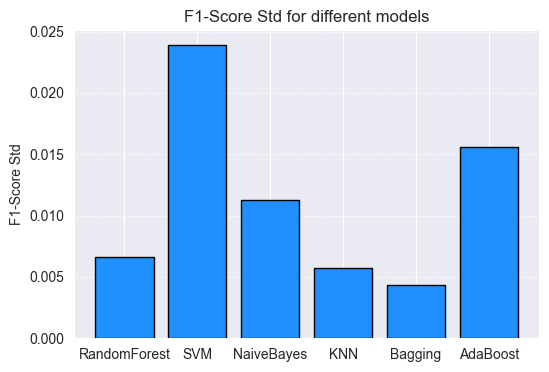

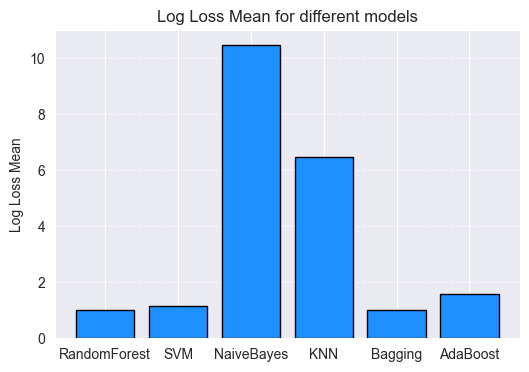

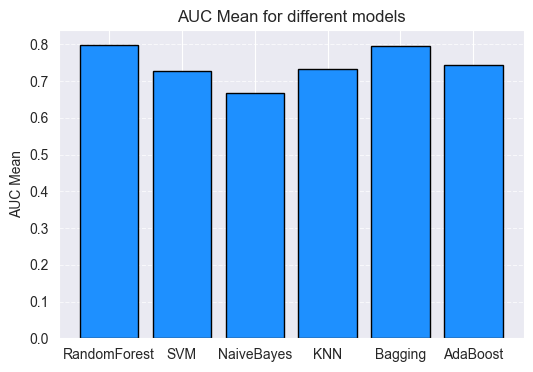

Best model: RandomForest with F1-Score = 0.5017767362219322
Worst model: NaiveBayes with F1-Score = 0.25995233621333663


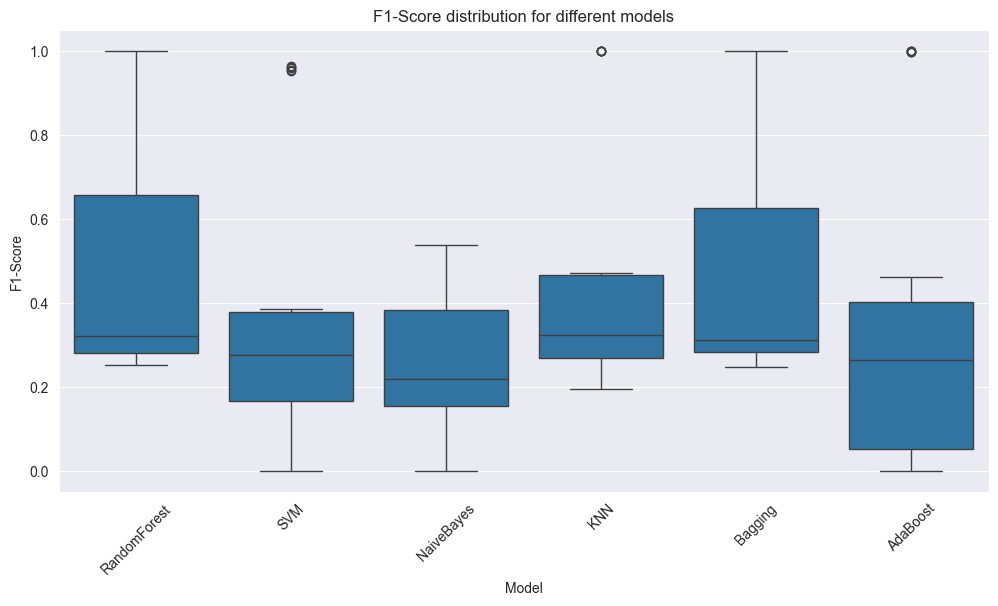

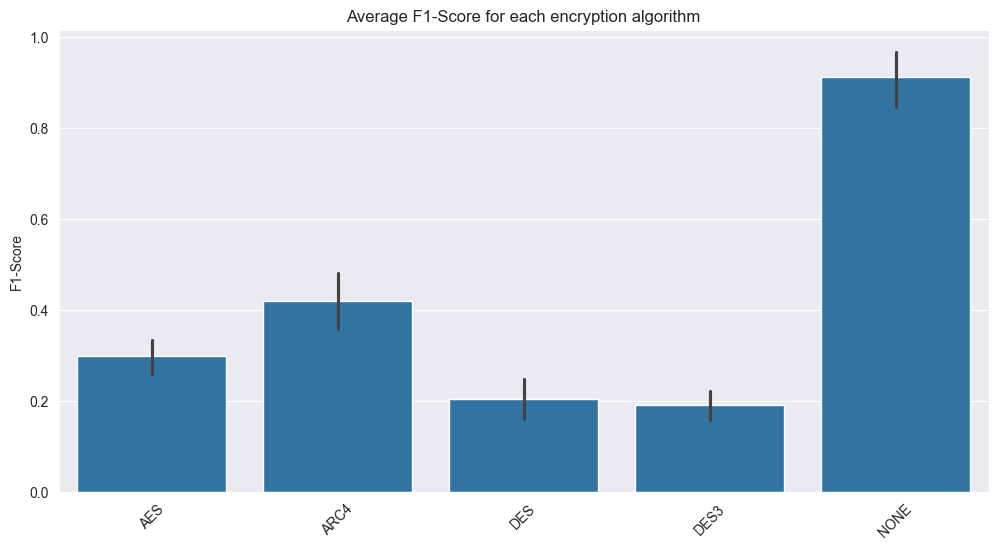

In [9]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [6]:
df_class_results_1key = pd.read_csv('df_class_results_3000_cbc_1key.csv')
df_class_results_1key

,0,RandomForest,0.1,0.282776,0.311174,0.296296
0,1,RandomForest,1,0.588774,0.713889,0.645323
1,2,RandomForest,2,0.291401,0.247297,0.267544
2,3,RandomForest,3,0.275290,0.232168,0.251897
3,4,RandomForest,4,1.000000,1.000000,1.000000
4,5,RandomForest,0,0.320704,0.336170,0.328255
...,...,...,...,...,...,...
144,145,AdaBoost,0,0.244406,0.812589,0.375786
145,146,AdaBoost,1,0.925620,0.154483,0.264775
146,147,AdaBoost,2,0.000000,0.000000,0.000000
147,148,AdaBoost,3,0.353488,0.208219,0.262069


In [7]:
encoder = LabelEncoder()
df_all_3keys['algorithm'] = encoder.fit_transform(df_all_3keys['algorithm'])
print(encoder.classes_)

X = df_all_3keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_3keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

(<pandas.io.formats.style.Styler at 0x127e23040>,
 <pandas.io.formats.style.Styler at 0x142f7d730>)

In [8]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.473111,0.004315,0.464831,0.003069,0.473111,0.004315,0.467375,0.003500,1.055759,0.768827
1,SVM,0.385167,0.002759,0.359816,0.040403,0.385167,0.002759,0.330566,0.020633,1.164718,0.701973
2,NaiveBayes,0.375889,0.006651,0.342312,0.028609,0.375889,0.006651,0.315124,0.017167,6.835403,0.686072
3,KNN,0.443444,0.002836,0.439582,0.002615,0.443444,0.002836,0.436910,0.002451,6.811910,0.713793
4,Bagging,0.477000,0.008535,0.469074,0.006888,0.477000,0.008535,0.471205,0.007418,1.063862,0.768762
5,AdaBoost,0.433000,0.015792,0.423056,0.026345,0.433000,0.015792,0.378088,0.026503,1.582615,0.718811


In [4]:
import pandas as pd
import io

csv_data = """
RandomForest,0.473111,0.004315,0.464831,0.003069,0.473111,0.004315,0.467375,0.003500,1.055759,0.768827
SVM,0.385167,0.002759,0.359816,0.040403,0.385167,0.002759,0.330566,0.020633,1.164718,0.701973
NaiveBayes,0.375889,0.006651,0.342312,0.028609,0.375889,0.006651,0.315124,0.017167,6.835403,0.686072
KNN,0.443444,0.002836,0.439582,0.002615,0.443444,0.002836,0.436910,0.002451,6.811910,0.713793
Bagging,0.477000,0.008535,0.469074,0.006888,0.477000,0.008535,0.471205,0.007418,1.063862,0.768762
AdaBoost,0.433000,0.015792,0.423056,0.026345,0.433000,0.015792,0.378088,0.026503,1.582615,0.718811
"""

# Definicje polskich nazw kolumn (11 kolumn, w tym AUC)
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.473111,0.004315,0.464831,0.003069,0.473111,0.004315,0.467375,0.003500,1.055759,0.768827
1,SVM,0.385167,0.002759,0.359816,0.040403,0.385167,0.002759,0.330566,0.020633,1.164718,0.701973
2,NaiveBayes,0.375889,0.006651,0.342312,0.028609,0.375889,0.006651,0.315124,0.017167,6.835403,0.686072
3,KNN,0.443444,0.002836,0.439582,0.002615,0.443444,0.002836,0.436910,0.002451,6.811910,0.713793
4,Bagging,0.477000,0.008535,0.469074,0.006888,0.477000,0.008535,0.471205,0.007418,1.063862,0.768762
5,AdaBoost,0.433000,0.015792,0.423056,0.026345,0.433000,0.015792,0.378088,0.026503,1.582615,0.718811


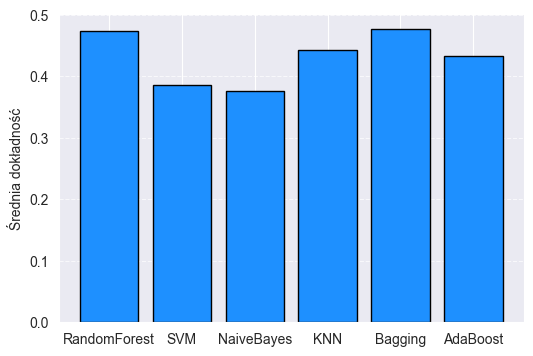

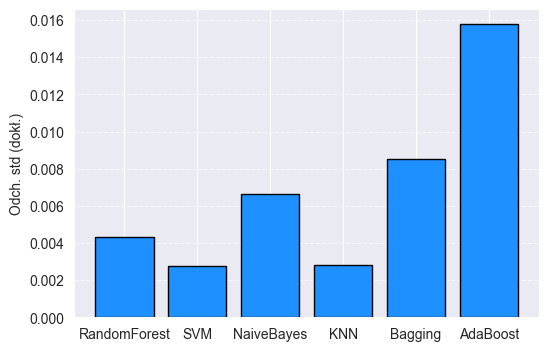

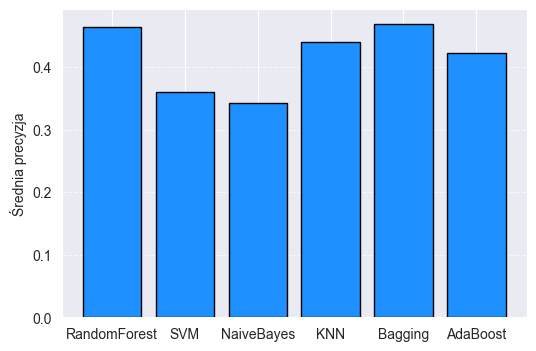

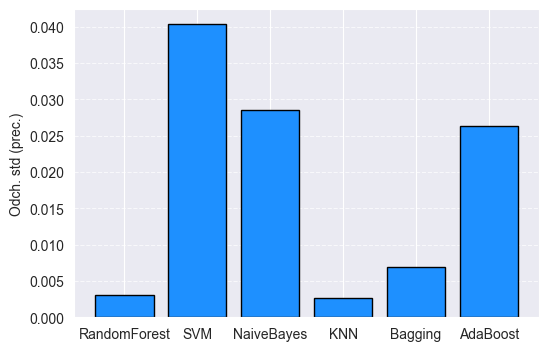

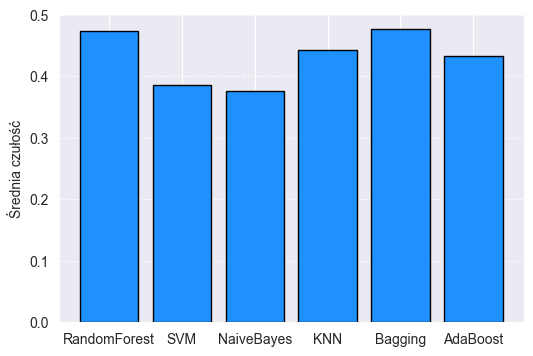

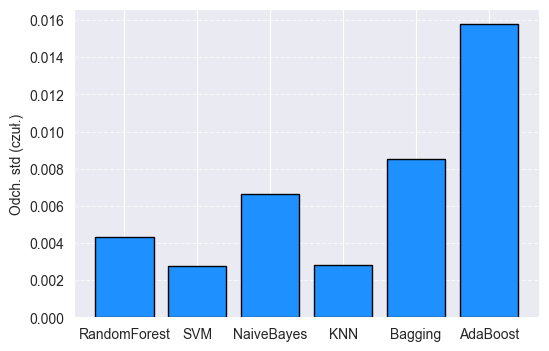

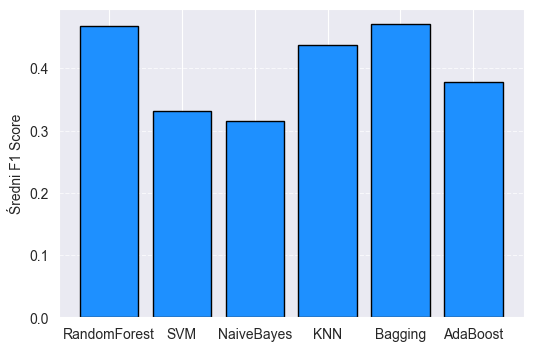

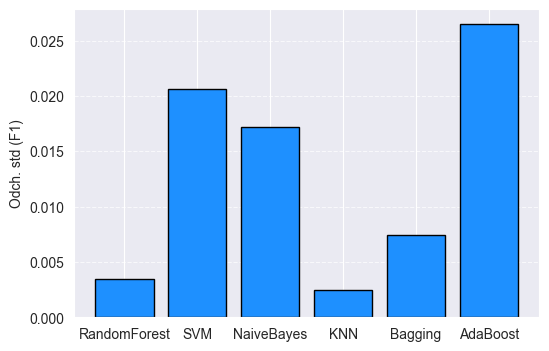

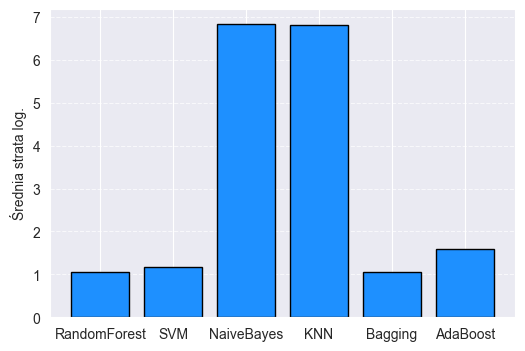

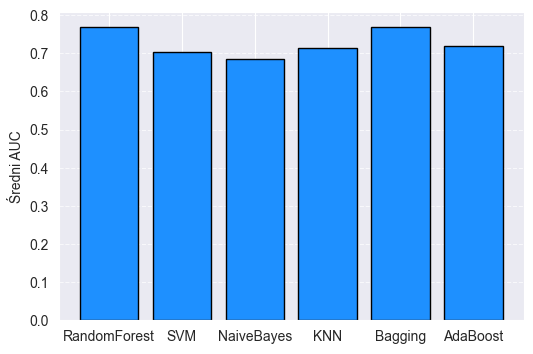

In [5]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

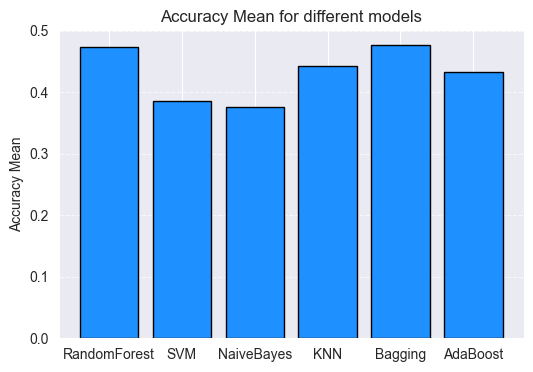

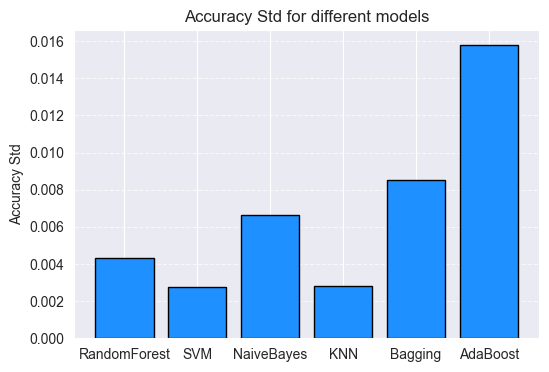

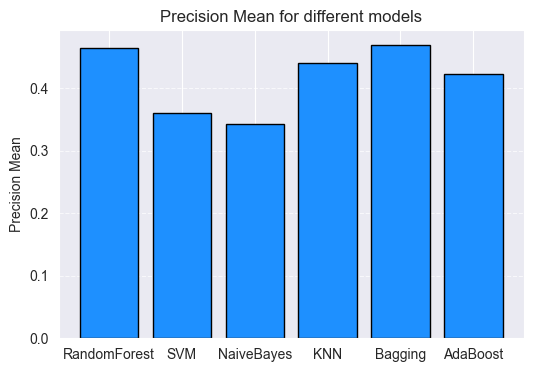

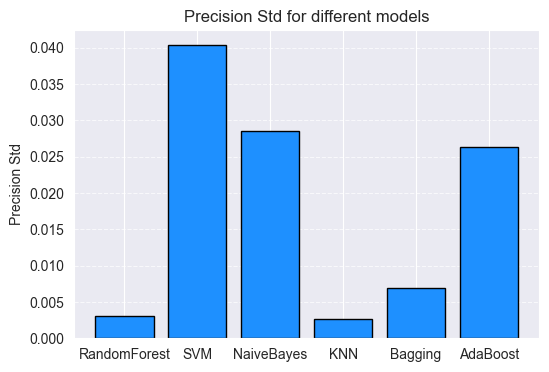

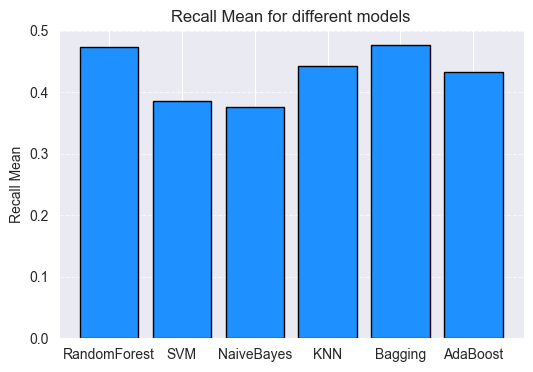

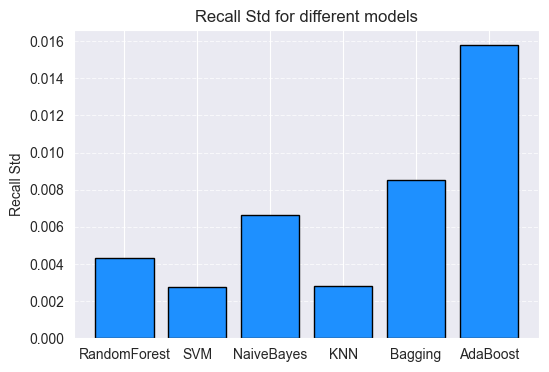

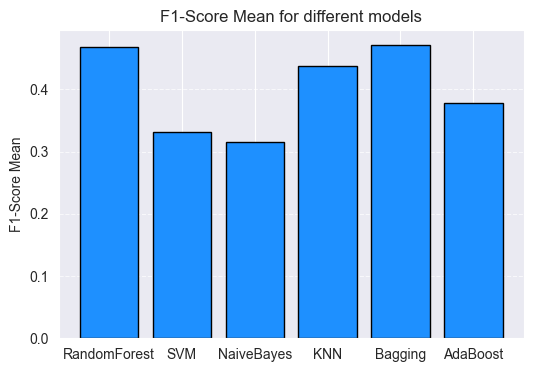

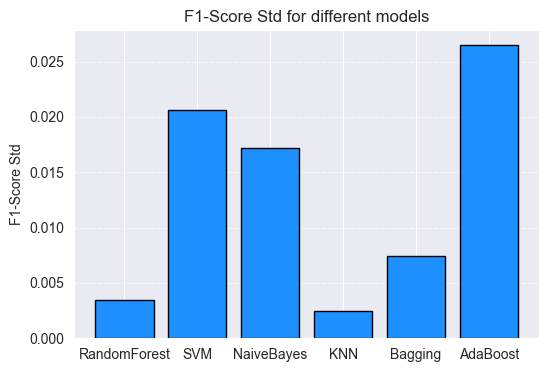

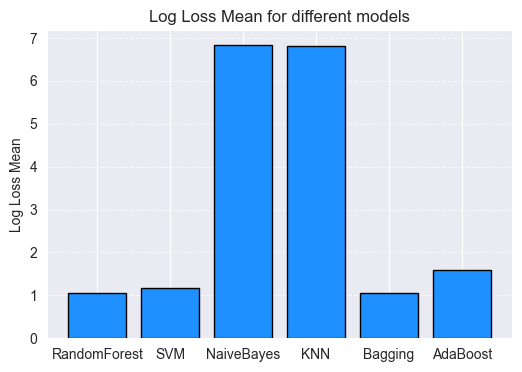

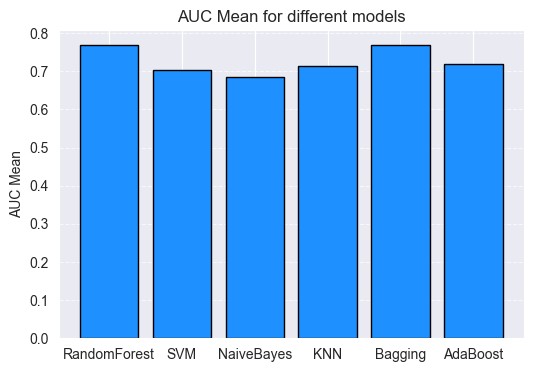

Best model: Bagging with F1-Score = 0.4712642490845924
Worst model: NaiveBayes with F1-Score = 0.31490056153774526


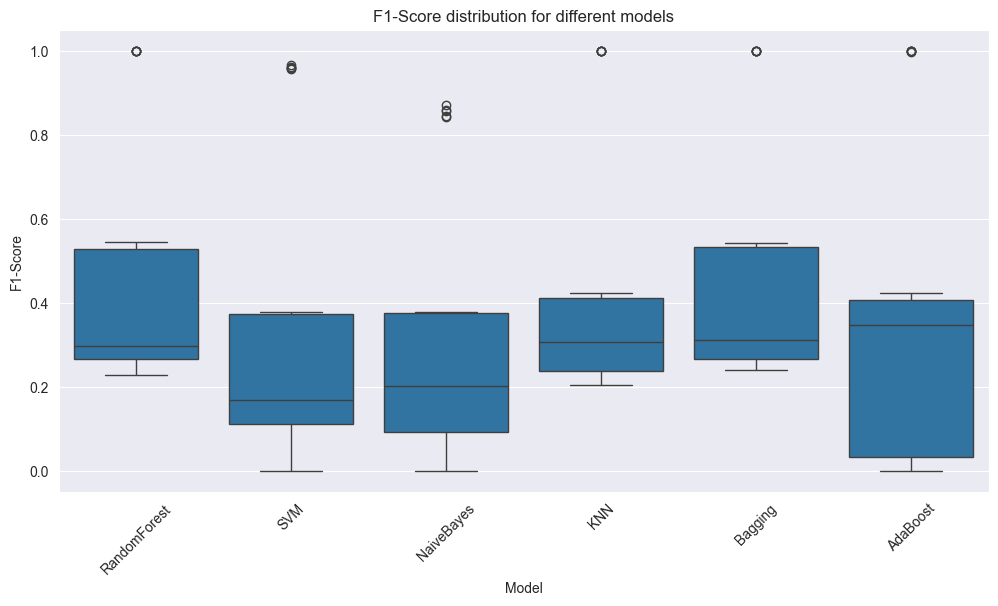

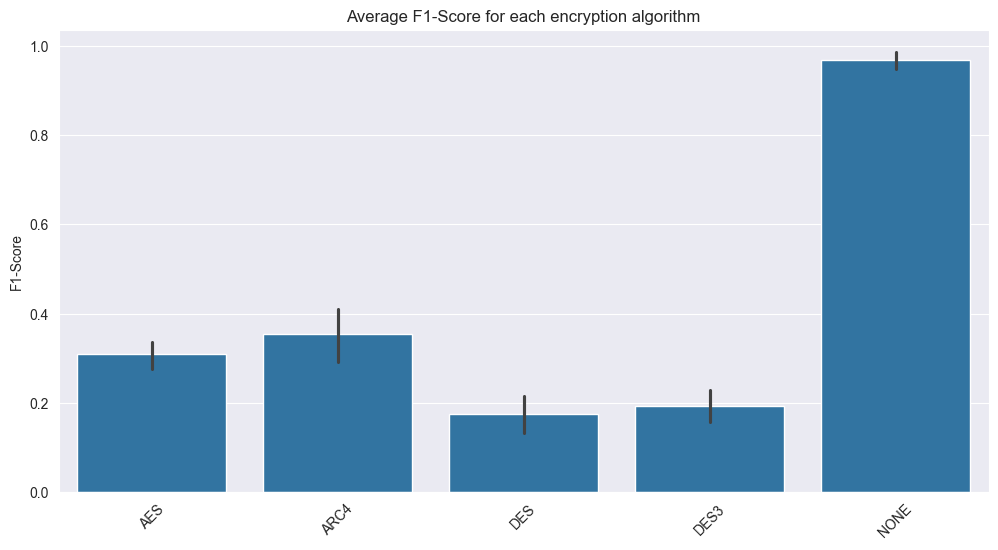

In [9]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [11]:
df_class_results_3keys = pd.read_csv('df_class_results_3000_cbc_3keys.csv')
df_class_results_3keys

,Unnamed: 0,Model,Class,Precision,Recall,F1-Score
0,0,RandomForest,0,0.295148,0.309760,0.302277
1,1,RandomForest,1,0.464668,0.602778,0.524788
2,2,RandomForest,2,0.293924,0.241892,0.265382
3,3,RandomForest,3,0.279732,0.233566,0.254573
4,4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
145,145,AdaBoost,0,0.250708,0.506438,0.335386
146,146,AdaBoost,1,0.382166,0.413793,0.397351
147,147,AdaBoost,2,0.266667,0.005533,0.010840
148,148,AdaBoost,3,0.286576,0.260274,0.272793


In [12]:
encoder = LabelEncoder()
df_all_6keys['algorithm'] = encoder.fit_transform(df_all_6keys['algorithm'])
print(encoder.classes_)

X = df_all_6keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_6keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

(<pandas.io.formats.style.Styler at 0x143392af0>,
 <pandas.io.formats.style.Styler at 0x146c8da00>)

In [13]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.447444,0.002029,0.443884,0.002167,0.447444,0.002029,0.444836,0.002033,1.091482,0.741476
1,SVM,0.387000,0.001515,0.365652,0.039248,0.387000,0.001515,0.329587,0.017244,1.164642,0.701247
2,NaiveBayes,0.372000,0.005639,0.323641,0.019288,0.372000,0.005639,0.305901,0.017048,6.789809,0.680271
3,KNN,0.421722,0.002456,0.418978,0.003711,0.421722,0.002456,0.416320,0.003023,7.341394,0.693469
4,Bagging,0.452333,0.006659,0.448506,0.006468,0.452333,0.006659,0.449203,0.006694,1.096187,0.744734
5,AdaBoost,0.410500,0.014046,0.421162,0.033444,0.410500,0.014046,0.331359,0.021061,1.582789,0.709422


In [6]:
import pandas as pd
import io

csv_data = """
RandomForest,0.447444,0.002029,0.443884,0.002167,0.447444,0.002029,0.444836,0.002033,1.091482,0.741476
SVM,0.387000,0.001515,0.365652,0.039248,0.387000,0.001515,0.329587,0.017244,1.164642,0.701247
NaiveBayes,0.372000,0.005639,0.323641,0.019288,0.372000,0.005639,0.305901,0.017048,6.789809,0.680271
KNN,0.421722,0.002456,0.418978,0.003711,0.421722,0.002456,0.416320,0.003023,7.341394,0.693469
Bagging,0.452333,0.006659,0.448506,0.006468,0.452333,0.006659,0.449203,0.006694,1.096187,0.744734
AdaBoost,0.410500,0.014046,0.421162,0.033444,0.410500,0.014046,0.331359,0.021061,1.582789,0.709422
"""

# Definicje polskich nazw kolumn (11 kolumn, w tym AUC)
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.447444,0.002029,0.443884,0.002167,0.447444,0.002029,0.444836,0.002033,1.091482,0.741476
1,SVM,0.387000,0.001515,0.365652,0.039248,0.387000,0.001515,0.329587,0.017244,1.164642,0.701247
2,NaiveBayes,0.372000,0.005639,0.323641,0.019288,0.372000,0.005639,0.305901,0.017048,6.789809,0.680271
3,KNN,0.421722,0.002456,0.418978,0.003711,0.421722,0.002456,0.416320,0.003023,7.341394,0.693469
4,Bagging,0.452333,0.006659,0.448506,0.006468,0.452333,0.006659,0.449203,0.006694,1.096187,0.744734
5,AdaBoost,0.410500,0.014046,0.421162,0.033444,0.410500,0.014046,0.331359,0.021061,1.582789,0.709422


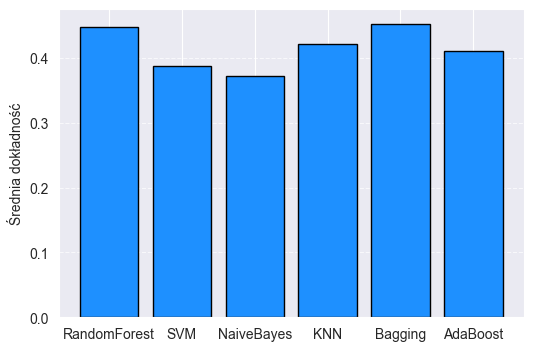

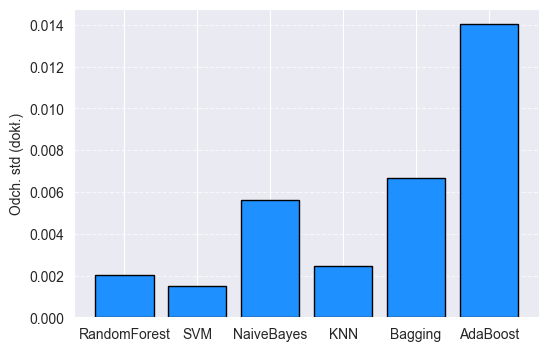

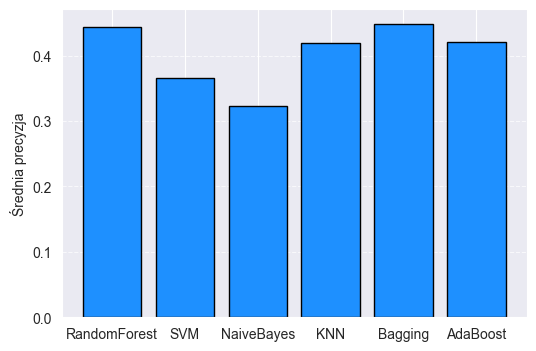

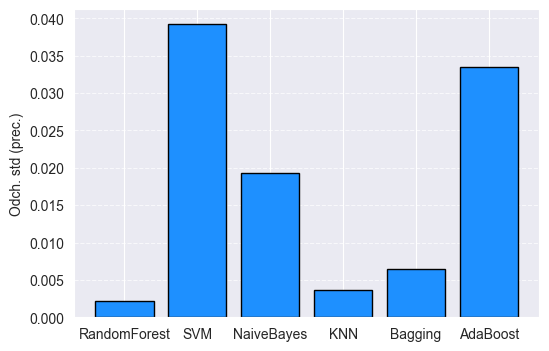

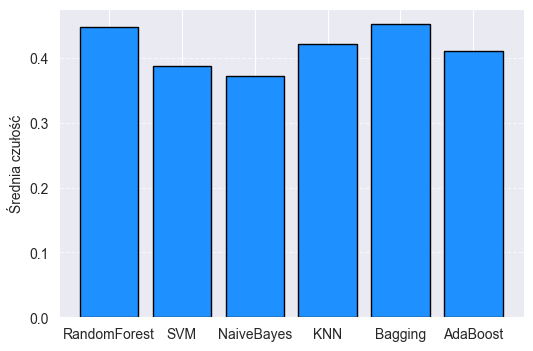

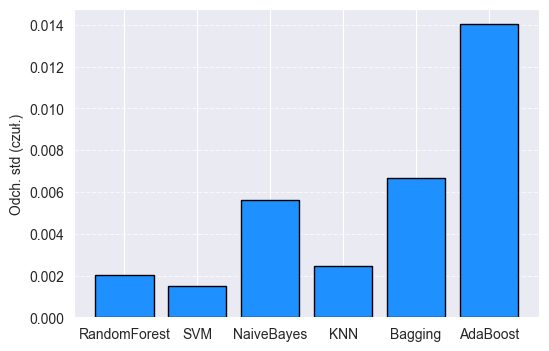

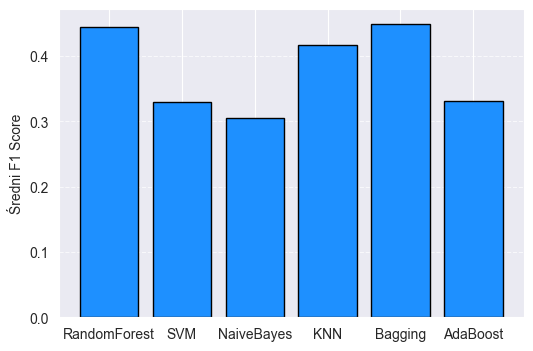

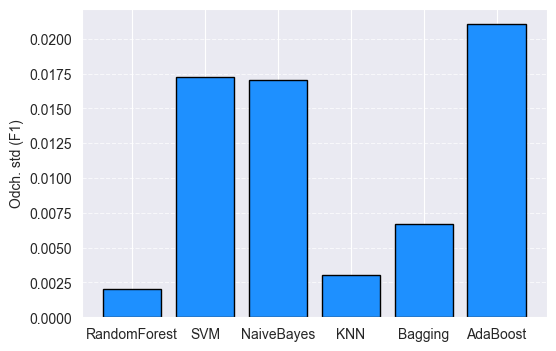

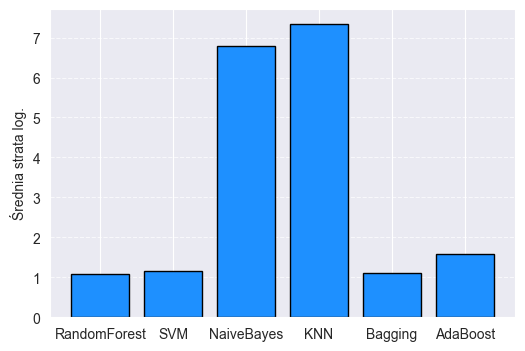

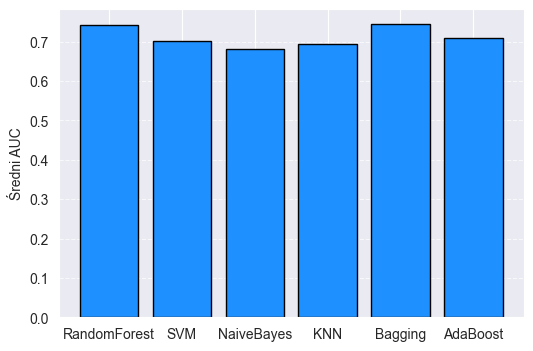

In [7]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

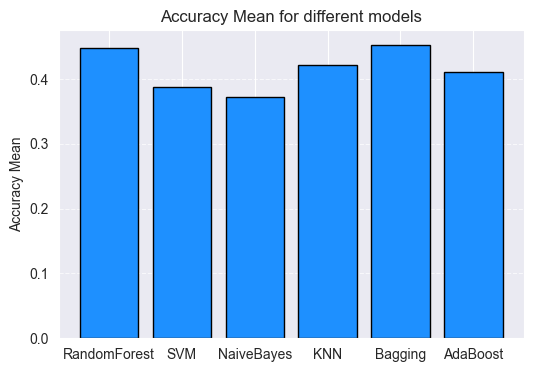

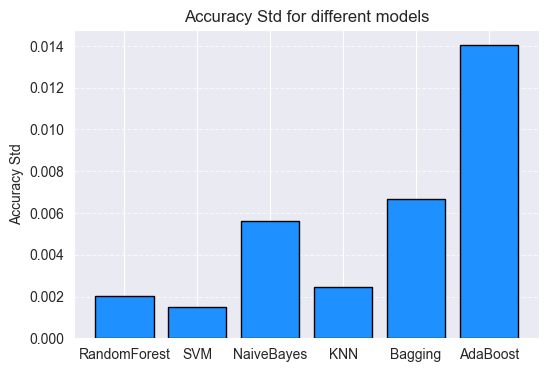

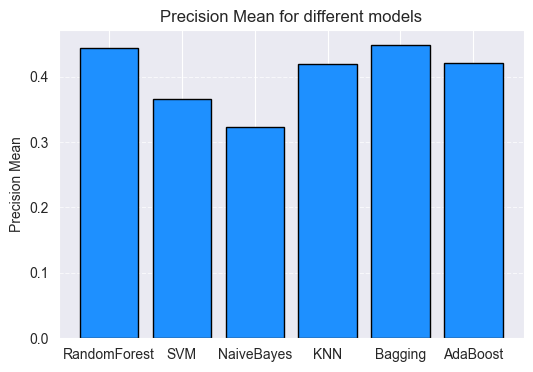

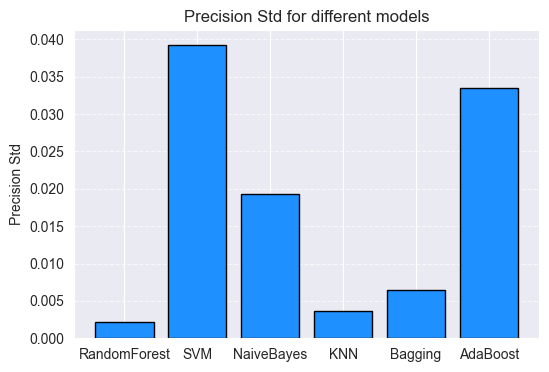

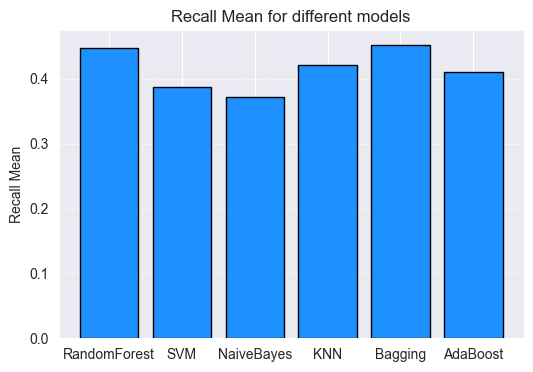

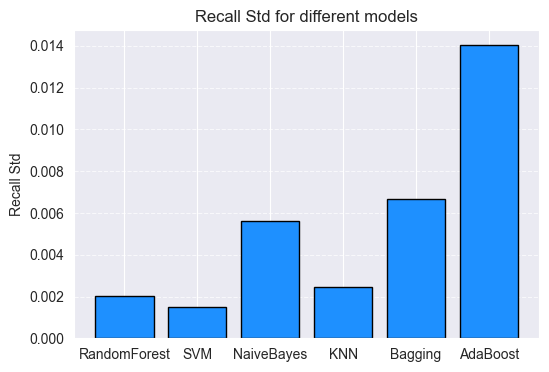

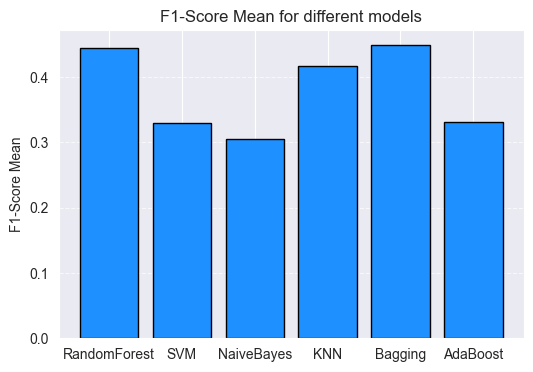

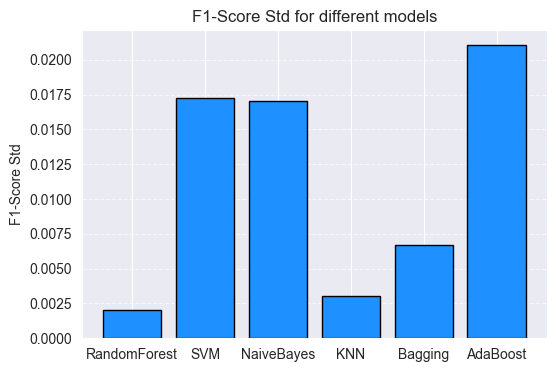

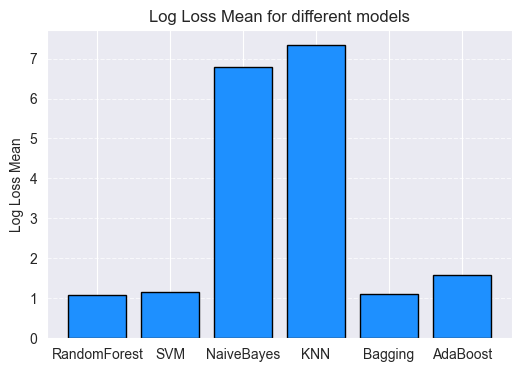

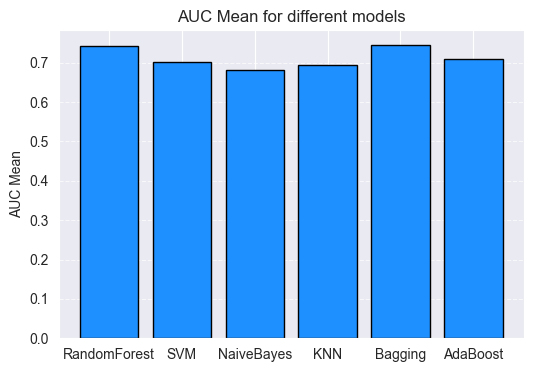

Best model: Bagging with F1-Score = 0.4491649816947818
Worst model: NaiveBayes with F1-Score = 0.30561338110790337


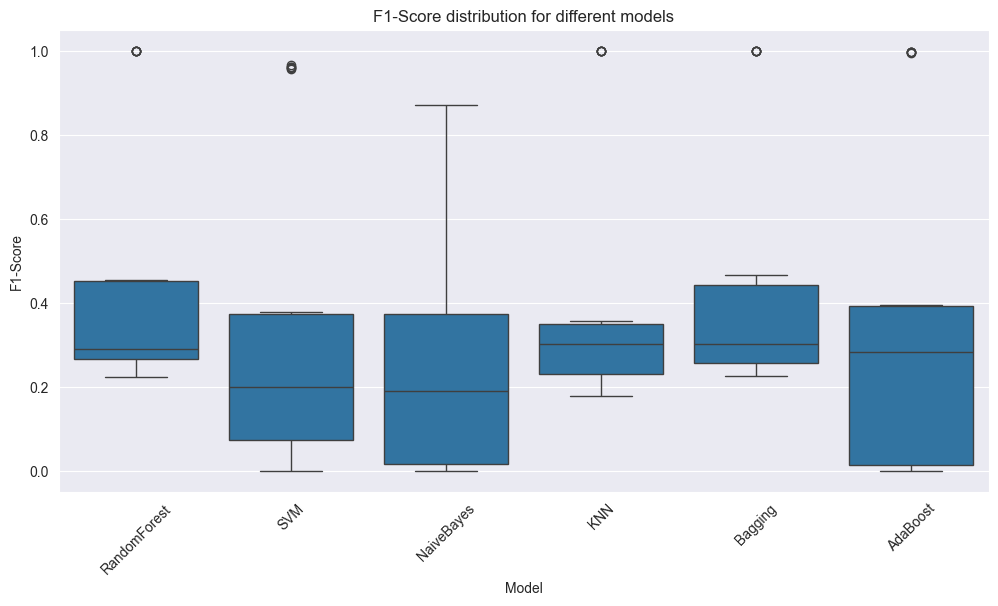

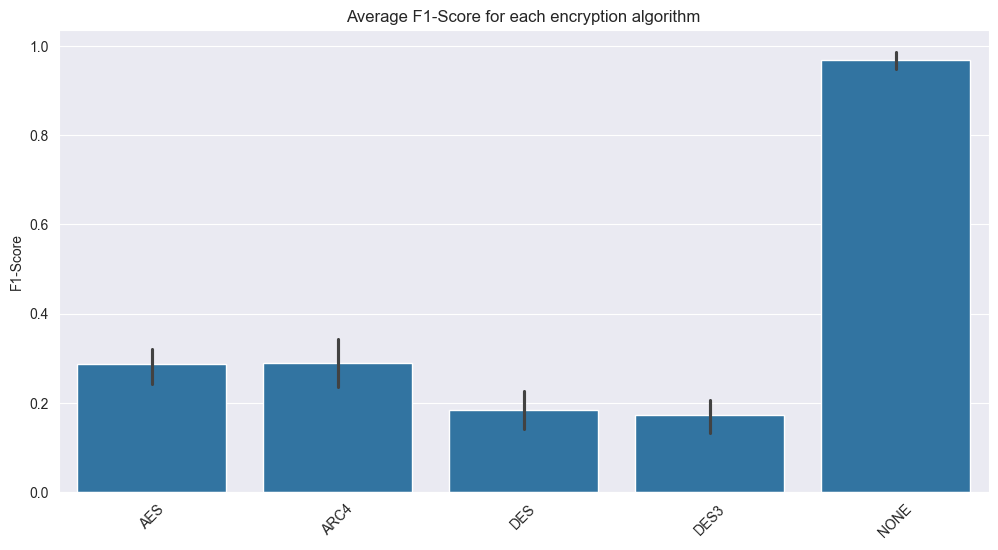

In [14]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [15]:
df_class_results

,Model,Class,Precision,Recall,F1-Score
0,RandomForest,0,0.252513,0.284300,0.267465
1,RandomForest,1,0.428928,0.477778,0.452037
2,RandomForest,2,0.288344,0.254054,0.270115
3,RandomForest,3,0.238924,0.211189,0.224202
4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...
145,AdaBoost,0,0.247271,0.939914,0.391538
146,AdaBoost,1,0.414286,0.120000,0.186096
147,AdaBoost,2,0.000000,0.000000,0.000000
148,AdaBoost,3,0.400000,0.002740,0.005442


In [16]:
df_class_results_6keys = pd.read_csv('df_class_results_3000_cbc_6keys.csv')
df_class_results_6keys

,0,RandomForest,0.1,0.252513,0.284300,0.267465
0,1,RandomForest,1,0.428928,0.477778,0.452037
1,2,RandomForest,2,0.288344,0.254054,0.270115
2,3,RandomForest,3,0.238924,0.211189,0.224202
3,4,RandomForest,4,1.000000,1.000000,1.000000
4,5,RandomForest,0,0.289172,0.321986,0.304698
...,...,...,...,...,...,...
144,145,AdaBoost,0,0.247271,0.939914,0.391538
145,146,AdaBoost,1,0.414286,0.120000,0.186096
146,147,AdaBoost,2,0.000000,0.000000,0.000000
147,148,AdaBoost,3,0.400000,0.002740,0.005442
